# Datensatz

In [4]:
import sys
print(sys.version)

3.13.5 (main, Jun 12 2025, 08:56:15) [GCC 11.4.0]


In [5]:
import pandas as pd

""" Quellen für den Datensatz:
https://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.CD?downloadformat=excel
https://population.un.org/wpp/Download/Standard/MostUsed/
https://hdr.undp.org/sites/default/files/2021-22_HDR/HDR21-22_Statistical_Annex_HDI_Table.xlsx
"""
df = pd.read_csv("all_data.csv")

In [6]:
# Dimension des Datensatzes
df.shape

(236, 35)

In [7]:
# Übersicht der Variablen
list(df)

['Country',
 'GDP per capita (current US$)',
 'Human Development Index (HDI) ',
 'Life expectancy at birth',
 'Mean years of schooling',
 'Total Population, as of 1 July (thousands)',
 'Median Age, as of 1 July (years)',
 'Natural Change, Births minus Deaths (thousands)',
 'Rate of Natural Change (per 1,000 population)',
 'Population Change (thousands)',
 'Population Growth Rate (percentage)',
 'Population Annual Doubling Time (years)',
 'Births (thousands)',
 'Births by women aged 15 to 19 (thousands)',
 'Crude Birth Rate (births per 1,000 population)',
 'Total Fertility Rate (live births per woman)',
 'Net Reproduction Rate (surviving daughters per woman)',
 'Sex Ratio at Birth (males per 100 female births)',
 'Total Deaths (thousands)',
 'Crude Death Rate (deaths per 1,000 population)',
 'Life Expectancy at Birth, both sexes (years)',
 'Life Expectancy at Age 15, both sexes (years)',
 'Life Expectancy at Age 65, both sexes (years)',
 'Life Expectancy at Age 80, both sexes (years)',


In [8]:
# Überflüssige Leerzeichen aus den Namen der Variablen löschen

df.rename(columns={
    'Country': 'country',
    'Total Population, as of 1 July (thousands)': 'population',
    'GDP per capita (current US$)': 'gdp_per_capita',
    'Net Migration Rate (per 1,000 population)': 'net_migration_rate',
    'Human Development Index (HDI) ': 'hdi',
    'Life expectancy at birth': 'life_expectancy',
    'Infant Mortality Rate (infant deaths per 1,000 live births)': 'infant_mortality_rate',
    'Mean years of schooling': 'mean_years_of_schooling',
    'Median Age, as of 1 July (years)': 'median_age',
}, inplace=True)

In [9]:
# Länder löschen, für die 'gdp_per_capita' fehlt.
df.dropna(subset=['gdp_per_capita'], inplace=True)

# Nicht relevante Spalten löschen
df = df[['country',
         'gdp_per_capita',
         'net_migration_rate',
         'hdi',
         'life_expectancy',
         'infant_mortality_rate',
         'mean_years_of_schooling',
         'median_age',
        ]]

In [10]:
# Deskriptive Statistiken
df.describe()

,gdp_per_capita,net_migration_rate,hdi,life_expectancy,infant_mortality_rate,mean_years_of_schooling,median_age
count,207.000000,207.000000,187.000000,190.000000,207.000000,187.000000,207.000000
mean,19807.130000,-0.567536,0.724920,71.368526,18.192754,9.009786,30.258792
std,30588.816018,6.063584,0.149474,7.747108,17.540949,3.179668,9.396390
min,221.160000,-44.230000,0.390000,52.530000,0.840000,2.110000,14.460000
25%,2538.045000,-1.385000,0.605000,65.670000,5.045000,6.330000,21.690000
50%,7230.200000,-0.300000,0.750000,71.745000,11.530000,9.310000,29.900000
75%,25741.840000,1.240000,0.840000,77.000000,26.965000,11.595000,38.230000
max,235132.780000,19.960000,0.960000,85.950000,73.040000,14.090000,54.520000


In [11]:
# Korrelationsmatrix aller unabhängigen Variablen
df_tmp = df.drop(columns='country')
df_tmp.corr()

,gdp_per_capita,net_migration_rate,hdi,life_expectancy,infant_mortality_rate,mean_years_of_schooling,median_age
gdp_per_capita,1.000000,0.265088,0.669115,0.619815,-0.443729,0.561263,0.602883
net_migration_rate,0.265088,1.000000,0.251477,0.292702,-0.110859,0.134081,0.209755
hdi,0.669115,0.251477,1.000000,0.905561,-0.869145,0.911875,0.895930
life_expectancy,0.619815,0.292702,0.905561,1.000000,-0.880485,0.734668,0.842462
infant_mortality_rate,-0.443729,-0.110859,-0.869145,-0.880485,1.000000,-0.780877,-0.797443
mean_years_of_schooling,0.561263,0.134081,0.911875,0.734668,-0.780877,1.000000,0.805805
median_age,0.602883,0.209755,0.895930,0.842462,-0.797443,0.805805,1.000000


In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Lösche temporär alle Länder ohne HDI
df_tmp = df.dropna(subset=['hdi'])

# Alle unabhängigen Variablen in X
X = df_tmp[['gdp_per_capita',
        'hdi',
        'life_expectancy',
        'infant_mortality_rate',
        'mean_years_of_schooling',
        'median_age',
        ]]

# Erstelle VIF Dataframe
vif_data = pd.DataFrame()
vif_data['VARIABLE'] = X.columns

# Errechne VIF für jede unabhängige Variable
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
              for i in range(X.shape[1])]
print(vif_data)

                  VARIABLE         VIF
0           gdp_per_capita    2.351307
1                      hdi  610.616369
2          life_expectancy  299.609581
3    infant_mortality_rate    4.086240
4  mean_years_of_schooling   73.244939
5               median_age   58.408664


In [13]:
# Teile Net Migration Rate in "negative", "positive" und "zero"

df['net_migration_rate signed'] = ''
df.loc[df.net_migration_rate < 0, 'net_migration_rate signed'] = "negative"
df.loc[df.net_migration_rate == 0, 'net_migration_rate signed'] = "zero"
df.loc[df.net_migration_rate > 0, 'net_migration_rate signed'] = "positive"

<Axes: xlabel='net_migration_rate signed', ylabel='count'>

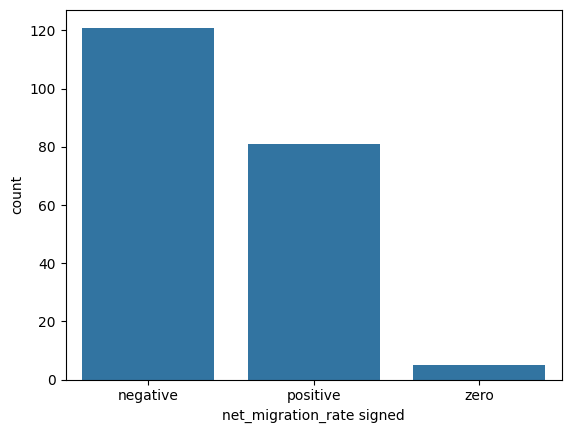

In [14]:
import seaborn as sns

sns.countplot(data=df, x="net_migration_rate signed")

<Axes: xlabel='gdp_per_capita', ylabel='net_migration_rate signed'>

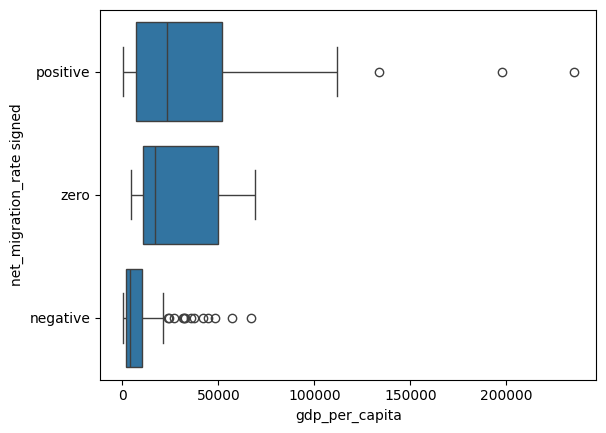

In [15]:
sns.boxplot(data=df, x='gdp_per_capita', y='net_migration_rate signed', order=['positive', 'zero', 'negative'])

<Axes: xlabel='gdp_per_capita', ylabel='net_migration_rate'>

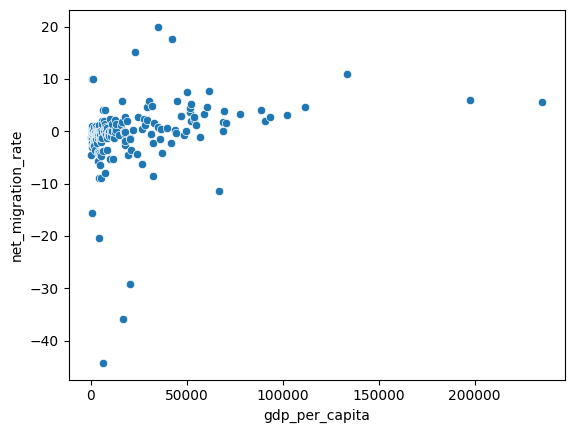

In [16]:
sns.scatterplot(data=df, x='gdp_per_capita', y='net_migration_rate')

<Axes: xlabel='gdp_per_capita', ylabel='net_migration_rate'>

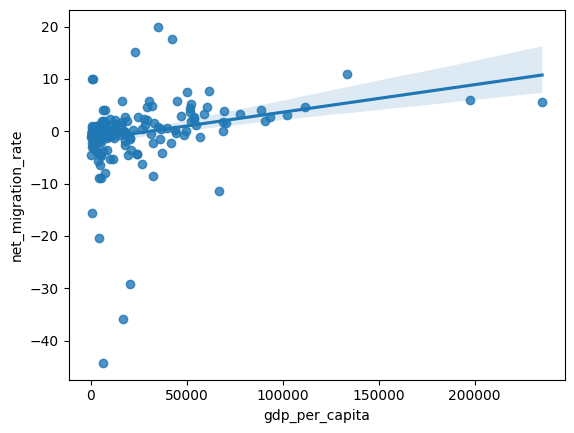

In [17]:
sns.regplot(data=df, x='gdp_per_capita', y='net_migration_rate')

### 1. Regression BIP/Kopf zu Migrationsrate

In [18]:
from statsmodels.formula.api import ols

regression_model = 'net_migration_rate ~ gdp_per_capita'
#regression = ols(regression_model, df).fit(cov_type='HC3')
regression = ols(regression_model, df).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:     net_migration_rate   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     15.49
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           0.000113
Time:                        21:03:30   Log-Likelihood:                -658.75
No. Observations:                 207   AIC:                             1322.
Df Residuals:                     205   BIC:                             1328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.6084      0.486     -3.

In [19]:
# Berechnung des Standardfehlers
import numpy as np

np.sqrt(regression.scale)
# Interpretation:
# Unser Modell verschätzt sich bezüglich der Nettomigrationsrate um durchschnittlich 5,86

np.float64(5.860898409856919)

In [20]:
# Berechnung des Standardfehlers im Verhältnis zur durchschn. Net Migration Rate
np.sqrt(regression.scale) / df["net_migration_rate"].mean()*100

# Interpretation:
# Unser Modell verschätzt sich bezüglich der Net Migration Rate um durchschnittlich -1032,69%

np.float64(-1032.6914971402641)

## 2. Regression BIP/Kopf-Quartile zu Migrationsrate

In [21]:
# Erstellen einer ordinalskalierten Kategorie-Variable 'gdp_per_capita_Quartile'
# Diese teilt die Beobachtungen in die vier Quartile der Variable 'gdp_per_capita' ein
df['gdp_per_capita_Quartile'] = pd.qcut(x=df['gdp_per_capita'], q=4,
                                 labels=["low", "medium", "high", "very_high"])

In [22]:
# Erstellt für jede der vier Kategorien von 'gdp_per_capita_Quartile' eine eigene Dummyvariable.
# Alle Dummyvariablen haben das Präfix 'gdp_per_capita_Quartile'.
df_tmp = pd.get_dummies(df, columns=['gdp_per_capita_Quartile'], prefix='gdp_per_capita_Quartile',
                             drop_first=True)  # Entferne die Referenzkategorie "low"

regression_model = 'net_migration_rate ~ gdp_per_capita_Quartile_medium + gdp_per_capita_Quartile_high + gdp_per_capita_Quartile_very_high'
regression = ols(regression_model, df_tmp).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:     net_migration_rate   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     7.221
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           0.000125
Time:                        21:03:30   Log-Likelihood:                -655.80
No. Observations:                 207   AIC:                             1320.
Df Residuals:                     203   BIC:                             1333.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [23]:
# Berechnung des Standardfehlers

np.sqrt(regression.scale)
# Interpretation:
# Unser Modell verschätzt sich bezüglich der Nettomigrationsrate um durchschnittlich 5,81

np.float64(5.80625602154547)

In [24]:
# Berechnung des Standardfehlers im Verhältnis zur durchschn. Net Migration Rate
np.sqrt(regression.scale) / df["net_migration_rate"].mean()*100

# Interpretation:
# Unser Modell verschätzt sich bezüglich der Net Migration Rate um durchschnittlich -1023,06%

np.float64(-1023.0634971568883)

## 3. Regression alle sechs Variablen zu Migrationsrate

In [25]:
# Nehme alle unabhängigen Variablen ins Modell auf

regression_model = 'net_migration_rate ~ gdp_per_capita + hdi + life_expectancy + infant_mortality_rate + mean_years_of_schooling + median_age'
regression = ols(regression_model, df).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:     net_migration_rate   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     5.290
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           4.78e-05
Time:                        21:03:30   Log-Likelihood:                -556.27
No. Observations:                 187   AIC:                             1127.
Df Residuals:                     180   BIC:                             1149.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [26]:
# Berechnung des Standardfehlers

np.sqrt(regression.scale)
# Interpretation:
# Unser Modell verschätzt sich bezüglich der Nettomigrationsrate um durchschnittlich 4,83

np.float64(4.830098000670123)

In [27]:
# Berechnung des Standardfehlers im Verhältnis zur durchschn. Net Migration Rate
np.sqrt(regression.scale) / df["net_migration_rate"].mean()*100

# Interpretation:
# Unser Modell verschätzt sich bezüglich der Net Migration Rate um durchschnittlich -851,06%

np.float64(-851.0642544592404)

## Prüfung der Modellprämissen

### 1. Annahme: Linearität in den Parametern

<Axes: xlabel='gdp_per_capita', ylabel='net_migration_rate'>

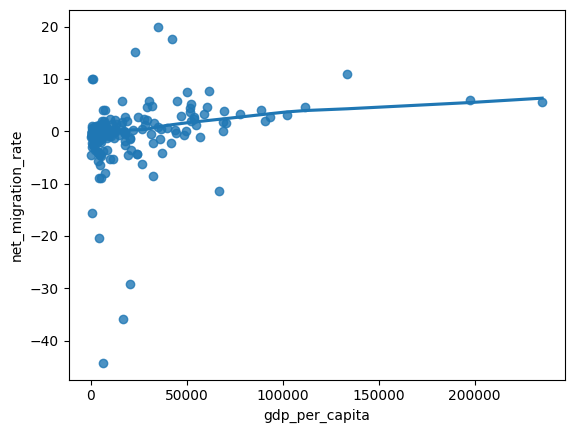

In [28]:
sns.regplot(data=df, x='gdp_per_capita', y='net_migration_rate', lowess=True)

### 2. Annahme: Regressionsmodell ist vollständig

In [29]:
df_tmp = df
df_tmp.drop(['country'], axis=1, inplace=True)
df_tmp.drop(['gdp_per_capita_Quartile'], axis=1, inplace=True)
df_tmp.drop(['net_migration_rate signed'], axis=1, inplace=True)

df_tmp['residuals'] = df_tmp["net_migration_rate"] - regression.fittedvalues
df_tmp.corr()

,gdp_per_capita,net_migration_rate,hdi,life_expectancy,infant_mortality_rate,mean_years_of_schooling,median_age,residuals
gdp_per_capita,1.000000e+00,0.265088,6.691146e-01,6.198147e-01,-4.437295e-01,5.612626e-01,6.028835e-01,8.791799e-14
net_migration_rate,2.650875e-01,1.000000,2.514773e-01,2.927022e-01,-1.108593e-01,1.340805e-01,2.097552e-01,9.220078e-01
hdi,6.691146e-01,0.251477,1.000000e+00,9.055605e-01,-8.691450e-01,9.118749e-01,8.959302e-01,5.438285e-14
life_expectancy,6.198147e-01,0.292702,9.055605e-01,1.000000e+00,-8.804849e-01,7.346684e-01,8.424622e-01,6.348036e-14
infant_mortality_rate,-4.437295e-01,-0.110859,-8.691450e-01,-8.804849e-01,1.000000e+00,-7.808767e-01,-7.974435e-01,-4.440608e-14
mean_years_of_schooling,5.612626e-01,0.134081,9.118749e-01,7.346684e-01,-7.808767e-01,1.000000e+00,8.058046e-01,3.362311e-14
median_age,6.028835e-01,0.209755,8.959302e-01,8.424622e-01,-7.974435e-01,8.058046e-01,1.000000e+00,5.661080e-14
residuals,8.791799e-14,0.922008,5.438285e-14,6.348036e-14,-4.440608e-14,3.362311e-14,5.661080e-14,1.000000e+00


### 3. Annahme: Homoskedastizität der Störgröße¶

In [30]:
from statsmodels.stats.diagnostic import het_white

white_test = het_white(regression.resid,  regression.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

# Ergebnis:
# P-Wert bei 3,07% (<5%), d.h. es liegt Homoskedastizität vor.

{'Test Statistic': np.float64(42.2916806046843), 'Test Statistic p-value': np.float64(0.030799371928699255), 'F-Statistic': np.float64(1.7210552167702466), 'F-Test p-value': np.float64(0.02139201779252039)}


## 4. Annahme: Unabhängigkeit der Störgrößen (keine Autokorrelation)
siehe OLS Regression Results, Durbin-Watson-Test

## 5. Annahme: Keine lineare Abhängigkeit zwischen den unabhängigen Variablen
bereits überprüft, siehe Korrelationsmatrix und VIF-Faktor

## 6. Annahme: Normalverteilung der Störgröße
siehe OLS Regression Results, Jarque-Beta-Test